In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from scipy.stats import boxcox, normaltest, jarque_bera
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

db_url = f'postgresql://{postgres_user}:{postgres_pw}@{postgres_host}:{postgres_port}/{postgres_db}'

engine = create_engine(db_url)

sp_df = pd.read_sql_query('SELECT * FROM studentsperformance;', con=engine)

# close the db connetion
engine.dispose()

### 1. Are the exam score variables normally distributed? If not, apply a Box-Cox transformation. Does anything change?

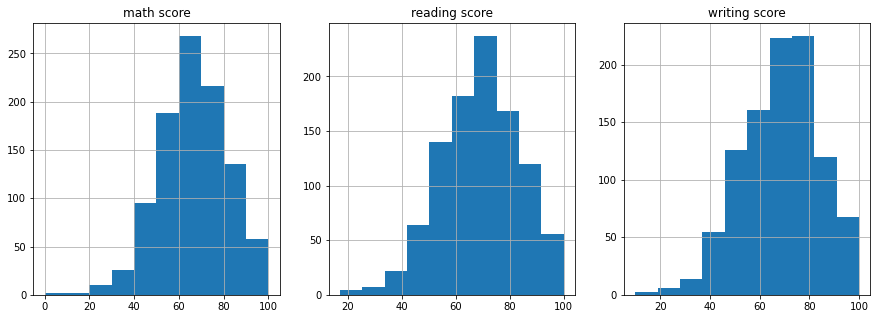

In [10]:
score_cols = ['math score','reading score', 'writing score']
plot_num = 1
plt.figure(figsize=[15,5])

for score in score_cols:
    plt.subplot(1,3, plot_num)
    fig = sp_df[score].hist()
    plt.title(score)
    plot_num += 1
    
plt.show()

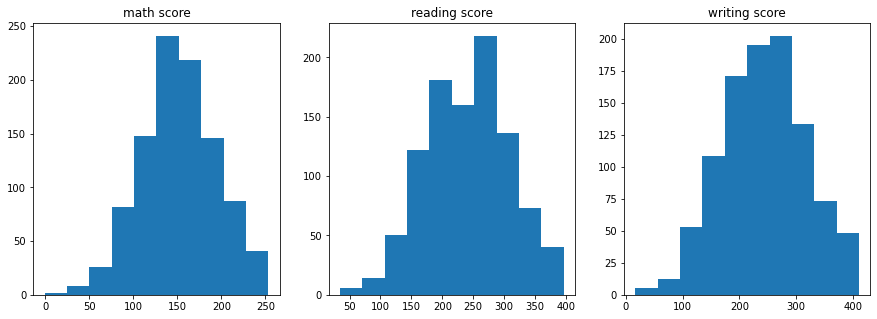

In [38]:
score_cols = ['math score','reading score', 'writing score']
plot_num = 1
plt.figure(figsize=[15,5])

for score in score_cols:
    plt.subplot(1,3, plot_num)
    data = sp_df[score] + 0.001
    plt.hist(boxcox(data)[0])
    plt.title(score)
    plot_num += 1
    
plt.show()

### 2. Say we want to use a single variable for the exam scores as our target. For this purpose, create a new variable by taking a weighted average of the exam scores. Check whether this new variable is normally distributed. If it's not normally distributed, apply a Box-Cox transformation and check whether or not the transformed variable is normally distributed.

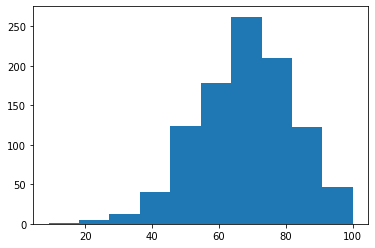

NormaltestResult(statistic=15.186721327231322, pvalue=0.0005037851534494478)

In [39]:
exam_score = (sp_df["math score"] +
              sp_df["reading score"] + sp_df["writing score"])/3
plt.hist(exam_score)
plt.show()
normaltest(exam_score)

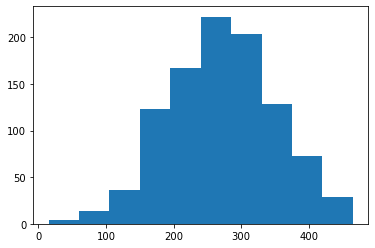

NormaltestResult(statistic=2.779857602227616, pvalue=0.24909303914726724)

In [41]:
boxcox_exam_score = boxcox(exam_score)[0]
plt.hist(boxcox_exam_score)
plt.show()
normaltest(boxcox_exam_score)

### 3. Which variables seem related to the target variable (the newly created variable in the previous question)? If our goal is to explain the determinants of success in exams, which variables in our dataset might be useful?

In [42]:
score_df = sp_df.filter(like='score', axis=1)

In [51]:
sp_df['exam_score'] = boxcox_exam_score

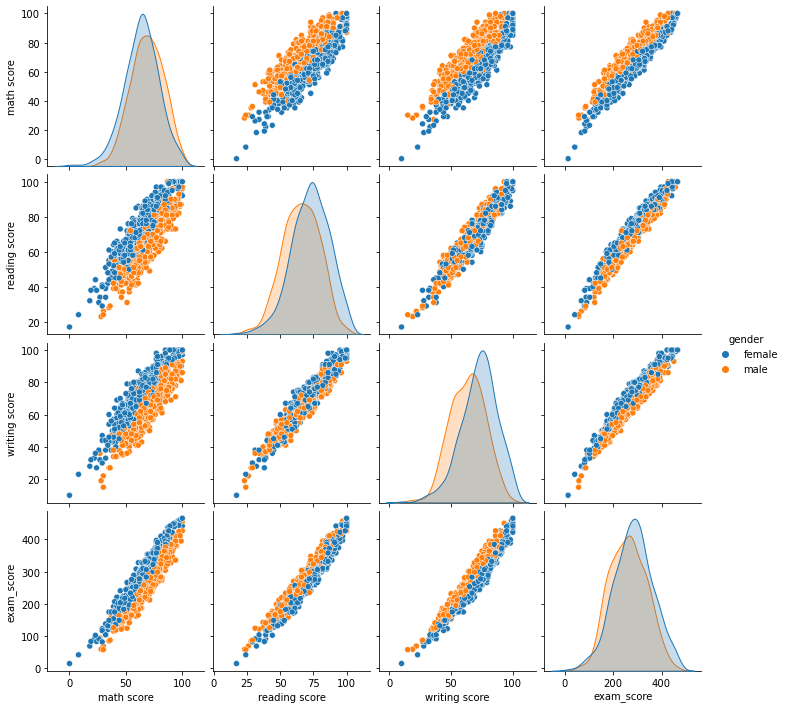

In [52]:
sns.pairplot(sp_df, hue='gender')
plt.show()

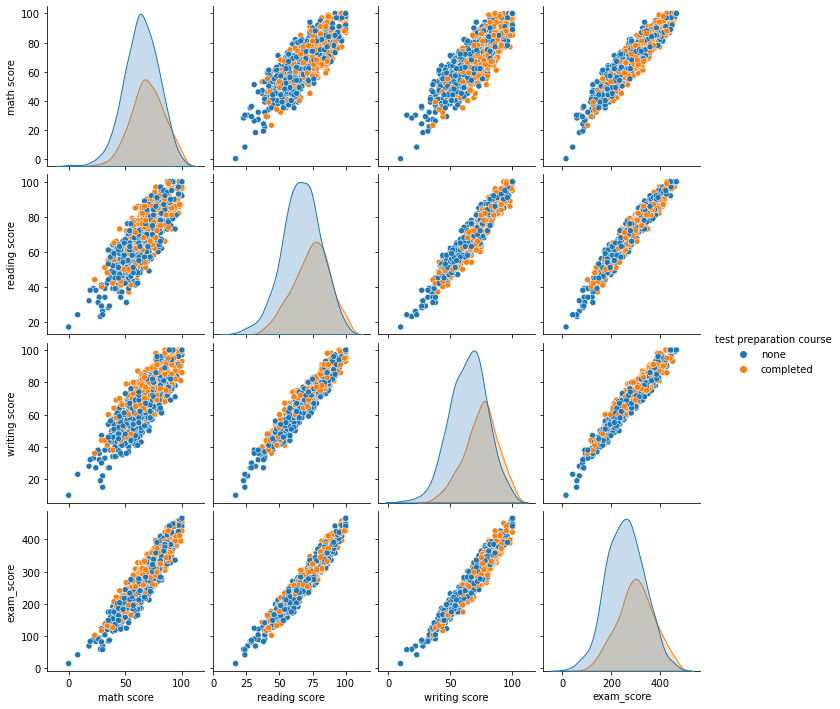

In [53]:
sns.pairplot(sp_df, hue='test preparation course')
plt.show()